# Hair Loss Prediction

by Muhammad Garin Anzahabi 

Milestones 2 - Phase 1 Hacktiv8

In here i will make a machine learning model to predict somebody's hair loss level based on kaggle dataset. This dataset that i use shows a 400 days progress from a person name Luke, he measure his hair every day for 400 days and note his everyday activities. The way that he measure his hair loss is that you put your one hand on your forehead, then move your hand towards the back of your head, make sure that your fingers is seperated and travel through your hairs. After this, count how many hairs that fell on your hand. Under 3(Low) means normal hair fall-off, a 4-6(Medium) means you have a slight hair loss symptom, if it's 6-10(Many) means you are experiencing hair losses, and over 10(A lot) indicates that you could have serious hair loss symptoms.

link kaggle dataset : https://www.kaggle.com/datasets/lukexun/luke-hair-loss-dataset

link huggingface : https://huggingface.co/spaces/anzahabi/MuhammadGarinAnzahabi_HCK002

```Scientifical Test Method Name : Pull Test and Tug Test```


# Import Libraries

Here shows every library that i will use

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# For Train Test Split
from sklearn.model_selection import train_test_split

# For VIF testing
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Oversampling
from imblearn.over_sampling import SMOTE

# Encode
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Scalling
from sklearn.preprocessing import MinMaxScaler

# Categorical Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as imbpipe

# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

# For Cross Validation
from sklearn.model_selection import cross_val_score

# Report
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

# For Hyperparamter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Data Loading

In [ ]:
Data = pd.read_csv('/content/Luke_hair_loss_documentation.csv')

In [ ]:
# Duplicate for EDA purposes only

Dataset = Data.copy()

In [ ]:
Data.head()

,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,1/01/2021,Few,2,Low,0,1,None,Low,Pantene,No,Y,3.0,None,1
1,2/01/2021,Few,0,Low,0,3,None,Low,Pantene,No,N,1.0,None,1
2,3/01/2021,Medium,3,Low,1,0,None,Low,Pantene,Yes,Y,2.0,None,2
3,4/01/2021,Few,2,Low,0,1,None,Low,Pantene,No,N,3.0,None,3
4,5/01/2021,Few,2,Low,0,1,None,Low,Pantene,No,Y,1.0,None,2


In [ ]:
Data.tail()

,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
395,31/01/2022,Medium,1,Low,1,2,None,Low,Hair & Shoulder,No,N,1.0,None,5
396,1/02/2022,Few,1,Low,0,3,None,Low,Hair & Shoulder,Yes,Y,2.0,None,1
397,2/02/2022,Medium,1,Low,1,1,None,Low,Hair & Shoulder,No,N,2.0,None,5
398,3/02/2022,Medium,0,Low,1,1,None,Low,Hair & Shoulder,No,N,2.0,None,5
399,4/02/2022,Few,1,Low,0,2,None,Low,Hair & Shoulder,Yes,Y,2.0,None,1


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    400 non-null    object 
 1   hair_loss               400 non-null    object 
 2   stay_up_late            400 non-null    int64  
 3   pressure_level          400 non-null    object 
 4   coffee_consumed         400 non-null    int64  
 5   brain_working_duration  400 non-null    int64  
 6   school_assesssment      400 non-null    object 
 7   stress_level            400 non-null    object 
 8   shampoo_brand           400 non-null    object 
 9   swimming                400 non-null    object 
 10  hair_washing            400 non-null    object 
 11  hair_grease             396 non-null    float64
 12  dandruff                400 non-null    object 
 13  libido                  400 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory 

In [ ]:
Data.describe()

,stay_up_late,coffee_consumed,brain_working_duration,hair_grease,libido
count,400.000000,400.000000,400.000000,396.000000,400.000000
mean,1.910000,1.162500,3.970000,2.565657,2.787500
std,1.611954,1.978859,4.215272,1.276162,1.822264
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,3.000000
75%,3.000000,1.000000,7.000000,4.000000,5.000000
max,8.000000,10.000000,18.000000,5.000000,5.000000


# EDA 

<Figure size 1440x1440 with 0 Axes>

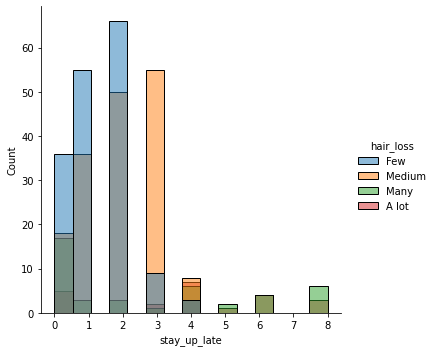

<Figure size 1440x1440 with 0 Axes>

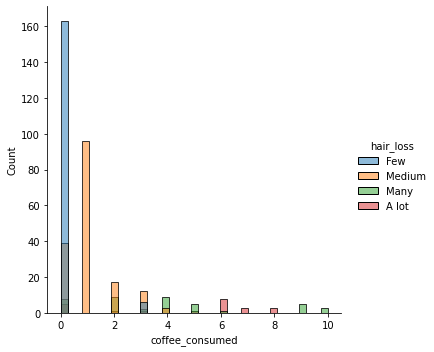

<Figure size 1440x1440 with 0 Axes>

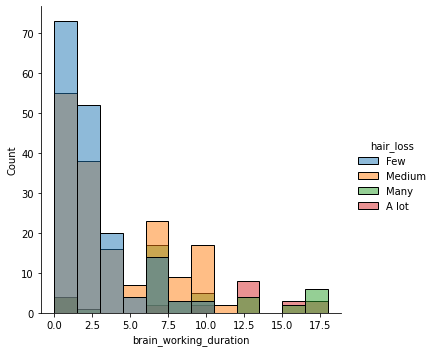

<Figure size 1440x1440 with 0 Axes>

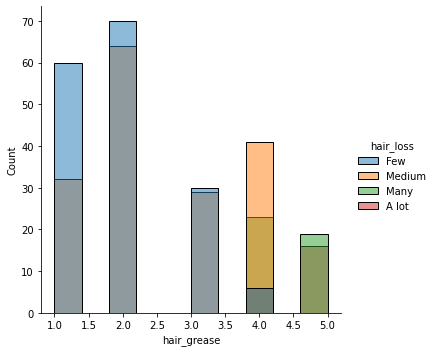

In [ ]:
numeric = Data[['stay_up_late', 'coffee_consumed', 'brain_working_duration',
       'hair_grease']]

for i in numeric:
  plt.figure(figsize=(20,20))
  sns.displot(data=Data, x=i, hue='hair_loss') 
  plt.show() 

From the numerical column we can conclude a couple of things: 

1. How luke's hair grease effected his hair lost

2. and drinking coffee also effected his hair lost

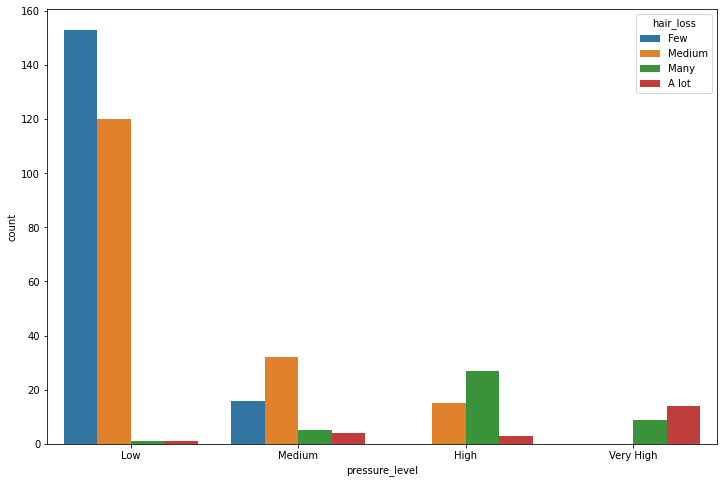

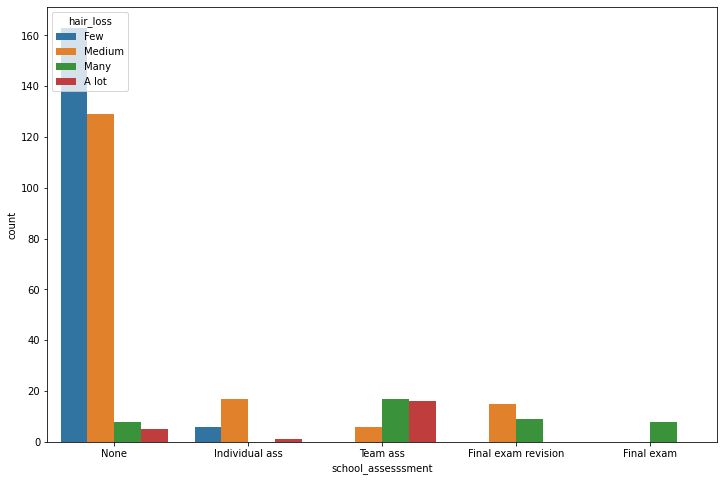

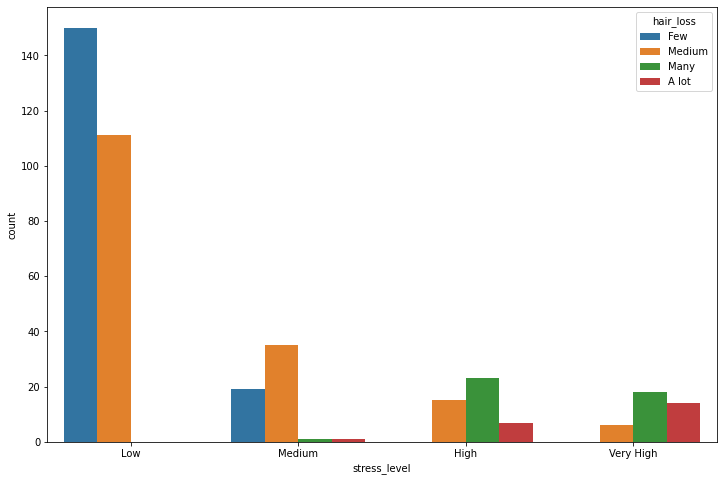

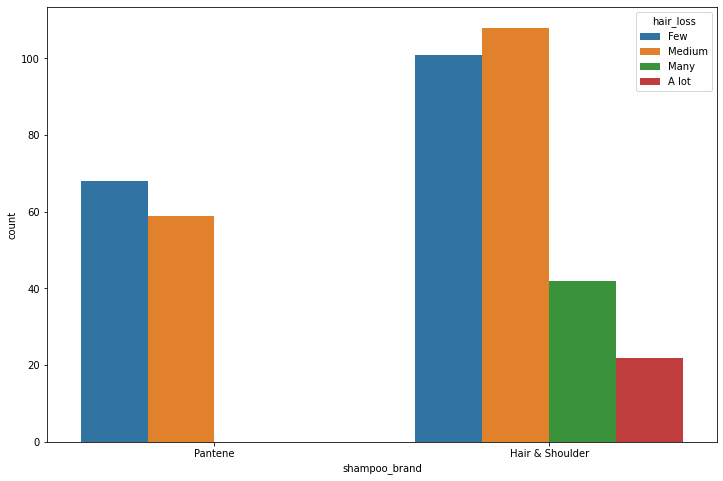

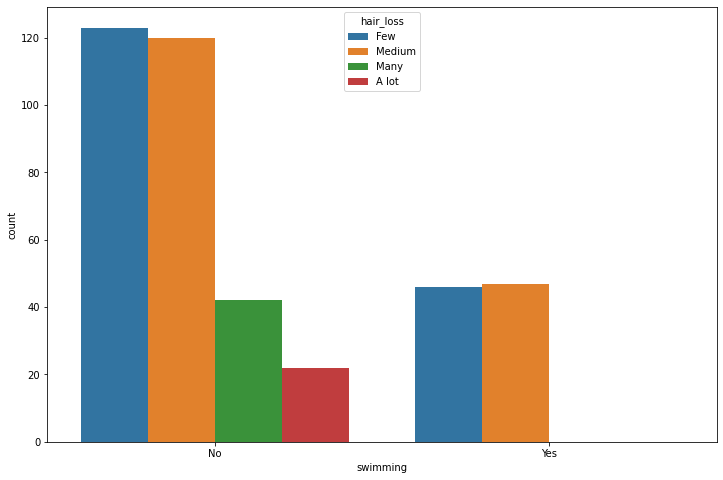

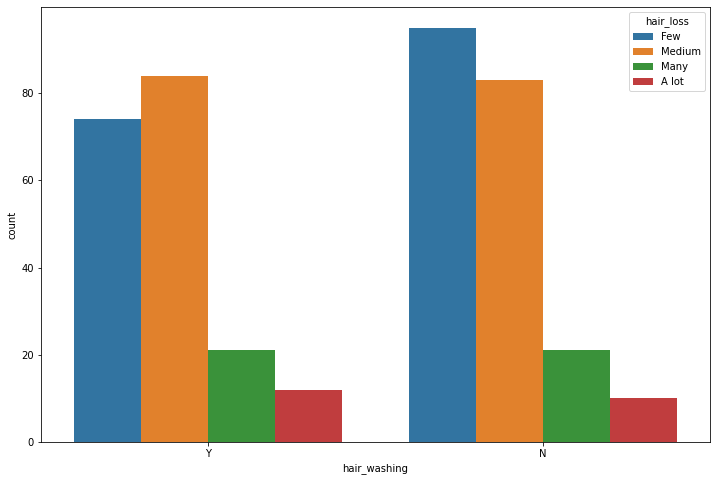

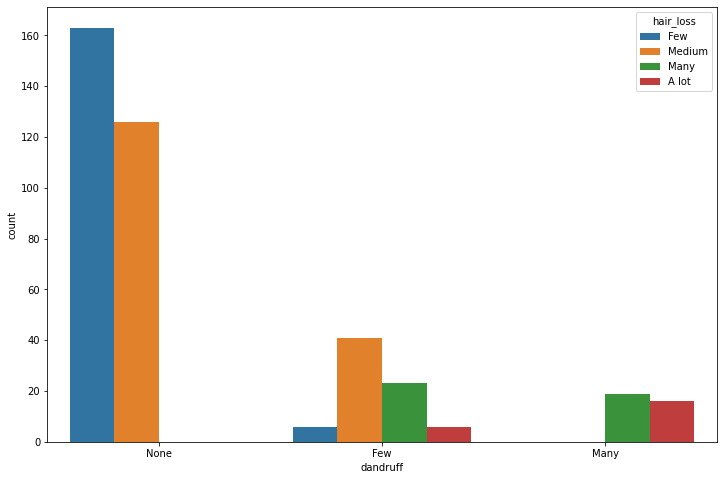

In [ ]:
categorical = Data[['pressure_level',
       'school_assesssment', 'stress_level', 'shampoo_brand', 'swimming', 'hair_washing', 'dandruff']]

for i in categorical:
  plt.figure(figsize=(12,8))
  sns.countplot(data=Data, x=i, hue='hair_loss') 
  plt.show() 

From the data we can conclude a couple of things: 

1. How in the scool_assesment we can see that if final exam came, luke always loss many hair and oftenly if there are a Team assignment luke will lost a lot of hair.

2. And i think its correlated to the stress_level class, becaue every time luke lost a lot of hair its cause by a very high stress level

3. Luke's hair always lost a lot when using hair & shoulder shampoo

4. From the dandruff class you can see that dandruff makes lukes hair fall out

5. Strangely when luke not swimming, lukes have not loss any hair its a bit strange because the water of the swimming pool its dirty

# Data Cleaning

## Checking Null Value

In here i want to see if there's any missing value

In [ ]:
Dataset.isnull().sum()

date                      0
hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
school_assesssment        0
stress_level              0
shampoo_brand             0
swimming                  0
hair_washing              0
hair_grease               4
dandruff                  0
libido                    0
dtype: int64

Turns out there are 4 missing value on the 'hair_grease' column

In [ ]:
Dataset[Dataset.hair_grease.isnull()]

,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
155,5/06/2021,Few,0,Low,0,2,None,Medium,Hair & Shoulder,No,N,NaN,None,1
156,6/06/2021,Medium,3,Low,0,0,None,Low,Hair & Shoulder,No,Y,NaN,None,1
157,7/06/2021,Few,2,Low,0,2,None,Low,Hair & Shoulder,No,N,NaN,None,1
158,8/06/2021,Few,0,Low,0,0,None,Low,Hair & Shoulder,No,N,NaN,None,3


Even though the missing value is only a few, but the amount of the data is not that much, thus i want to fill all the missing value with the mode of the column value

In [ ]:
Dataset.mode()['hair_grease'][0]

2.0

i will fill all the Nan with '2'

In [ ]:
Dataset['hair_grease'] = Dataset['hair_grease'].fillna(2.0)

In [ ]:
Dataset.isnull().sum()

date                      0
hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
school_assesssment        0
stress_level              0
shampoo_brand             0
swimming                  0
hair_washing              0
hair_grease               0
dandruff                  0
libido                    0
dtype: int64

Now there are no missing value left

## Duplicated Data

and now i wanna check if there's any duplicated value in this dataset

In [ ]:
Dataset.duplicated().sum()

0

Turns out there are no duplicated data here

# Data Preprocessing for feature selection

## Categorical Data

### Date

For this date column i will just drop it because the date its just like an index knowing that it only show the date in order

In [ ]:
Data = Data.drop('date ', axis=1)

### Pressure Level

In [ ]:
Data['pressure_level'].value_counts()

Low          275
Medium        57
High          45
Very High     23
Name: pressure_level, dtype: int64

In [ ]:
pressure_level = ['Low', 'Medium', 'High', 'Very High']

ord_enc_inc = OrdinalEncoder(categories=[pressure_level])
cat_ord_inc = pd.DataFrame(ord_enc_inc.fit_transform(Data[['pressure_level']]))
cat_ord_inc.columns = ['pressure_level']

In [ ]:
Data = Data.drop('pressure_level', axis=1)
Data=pd.concat([Data.reset_index(drop=True), cat_ord_inc], axis=1)
Data

,stay_up_late,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido,hair_loss,pressure_level
0,2,0,1,None,Low,Pantene,No,Y,3.0,None,1,0.0,0.0
1,0,0,3,None,Low,Pantene,No,N,1.0,None,1,0.0,0.0
2,3,1,0,None,Low,Pantene,Yes,Y,2.0,None,2,1.0,0.0
3,2,0,1,None,Low,Pantene,No,N,3.0,None,3,0.0,0.0
4,2,0,1,None,Low,Pantene,No,Y,1.0,None,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,2,None,Low,Hair & Shoulder,No,N,1.0,None,5,1.0,0.0
396,1,0,3,None,Low,Hair & Shoulder,Yes,Y,2.0,None,1,0.0,0.0
397,1,1,1,None,Low,Hair & Shoulder,No,N,2.0,None,5,1.0,0.0
398,0,1,1,None,Low,Hair & Shoulder,No,N,2.0,None,5,1.0,0.0


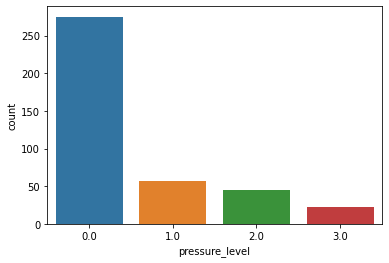

In [ ]:
sns.countplot(x='pressure_level', data = Data)

### School Assessment

In [ ]:
Data['school_assesssment'].value_counts()

None                   305
Team ass                39
Individual ass          24
Final exam revision     24
Final exam               8
Name: school_assesssment, dtype: int64

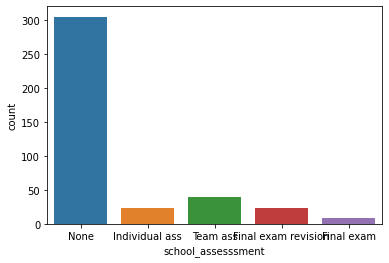

In [ ]:
sns.countplot(x='school_assesssment', data = Data)

In [ ]:
school_assesssment = ['None', 'Team ass', 'Individual ass', 'Final exam revision', 'Final exam']

ord_enc_inc = OrdinalEncoder(categories=[school_assesssment])
cat_ord_inc = pd.DataFrame(ord_enc_inc.fit_transform(Data[['school_assesssment']]))
cat_ord_inc.columns = ['school_assesssment']

In [ ]:
Data = Data.drop('school_assesssment', axis=1)
Data=pd.concat([Data.reset_index(drop=True), cat_ord_inc], axis=1)
Data

,stay_up_late,coffee_consumed,brain_working_duration,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido,hair_loss,pressure_level,school_assesssment
0,2,0,1,Low,Pantene,No,Y,3.0,None,1,0.0,0.0,0.0
1,0,0,3,Low,Pantene,No,N,1.0,None,1,0.0,0.0,0.0
2,3,1,0,Low,Pantene,Yes,Y,2.0,None,2,1.0,0.0,0.0
3,2,0,1,Low,Pantene,No,N,3.0,None,3,0.0,0.0,0.0
4,2,0,1,Low,Pantene,No,Y,1.0,None,2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,2,Low,Hair & Shoulder,No,N,1.0,None,5,1.0,0.0,0.0
396,1,0,3,Low,Hair & Shoulder,Yes,Y,2.0,None,1,0.0,0.0,0.0
397,1,1,1,Low,Hair & Shoulder,No,N,2.0,None,5,1.0,0.0,0.0
398,0,1,1,Low,Hair & Shoulder,No,N,2.0,None,5,1.0,0.0,0.0


### Stress Level

In [ ]:
Data['stress_level'].value_counts()

Low          261
Medium        56
High          45
Very High     38
Name: stress_level, dtype: int64

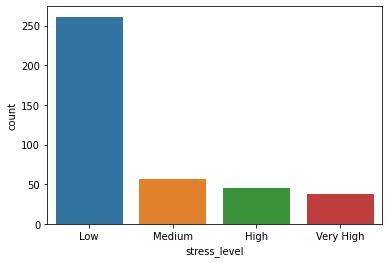

In [ ]:
sns.countplot(x='stress_level', data = Data)

In [ ]:
stress_level = ['Low', 'Medium', 'High', 'Very High']

ord_enc_inc = OrdinalEncoder(categories=[stress_level])
cat_ord_inc = pd.DataFrame(ord_enc_inc.fit_transform(Data[['stress_level']]))
cat_ord_inc.columns = ['stress_level']

In [ ]:
Data = Data.drop('stress_level', axis=1)
Data=pd.concat([Data.reset_index(drop=True), cat_ord_inc], axis=1)
Data

,stay_up_late,coffee_consumed,brain_working_duration,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido,hair_loss,pressure_level,school_assesssment,stress_level
0,2,0,1,Pantene,No,Y,3.0,None,1,0.0,0.0,0.0,0.0
1,0,0,3,Pantene,No,N,1.0,None,1,0.0,0.0,0.0,0.0
2,3,1,0,Pantene,Yes,Y,2.0,None,2,1.0,0.0,0.0,0.0
3,2,0,1,Pantene,No,N,3.0,None,3,0.0,0.0,0.0,0.0
4,2,0,1,Pantene,No,Y,1.0,None,2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,2,Hair & Shoulder,No,N,1.0,None,5,1.0,0.0,0.0,0.0
396,1,0,3,Hair & Shoulder,Yes,Y,2.0,None,1,0.0,0.0,0.0,0.0
397,1,1,1,Hair & Shoulder,No,N,2.0,None,5,1.0,0.0,0.0,0.0
398,0,1,1,Hair & Shoulder,No,N,2.0,None,5,1.0,0.0,0.0,0.0


### Shampoo Brand

In [ ]:
Data['shampoo_brand'].value_counts()

Hair & Shoulder    273
Pantene            127
Name: shampoo_brand, dtype: int64

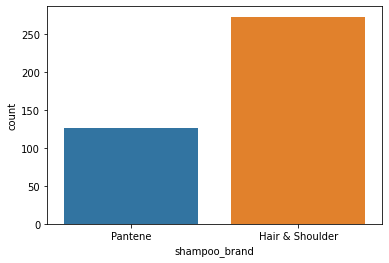

In [ ]:
sns.countplot(x='shampoo_brand', data = Data)

In [ ]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(Data[['shampoo_brand']]))
cat_ohe.columns = ohe_enc.get_feature_names(['shampoo_brand'])
Data = Data.drop('shampoo_brand', axis=1)
Data = pd.concat([Data.reset_index(drop=True), cat_ohe], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Data.head()

,stay_up_late,coffee_consumed,brain_working_duration,swimming,hair_washing,hair_grease,dandruff,libido,hair_loss,pressure_level,school_assesssment,stress_level,shampoo_brand_Hair & Shoulder,shampoo_brand_Pantene
0,2,0,1,No,Y,3.0,None,1,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,3,No,N,1.0,None,1,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,0,Yes,Y,2.0,None,2,1.0,0.0,0.0,0.0,0.0,1.0
3,2,0,1,No,N,3.0,None,3,0.0,0.0,0.0,0.0,0.0,1.0
4,2,0,1,No,Y,1.0,None,2,0.0,0.0,0.0,0.0,0.0,1.0


### Swimming

In [ ]:
Data['swimming'].value_counts()

No     307
Yes     93
Name: swimming, dtype: int64

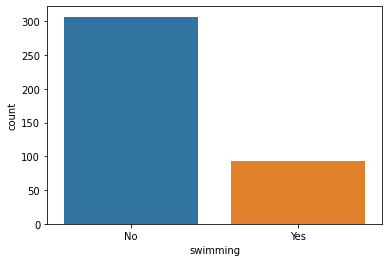

In [ ]:
sns.countplot(x='swimming', data = Data)

In [ ]:
swimming = ['No', 'Yes']

ord_enc_inc = OrdinalEncoder(categories=[swimming])
cat_ord_inc = pd.DataFrame(ord_enc_inc.fit_transform(Data[['swimming']]))
cat_ord_inc.columns = ['swimming']

In [ ]:
Data = Data.drop('swimming', axis=1)
Data=pd.concat([Data.reset_index(drop=True), cat_ord_inc], axis=1)
Data.head()

,stay_up_late,coffee_consumed,brain_working_duration,hair_washing,hair_grease,dandruff,libido,hair_loss,pressure_level,school_assesssment,stress_level,shampoo_brand_Hair & Shoulder,shampoo_brand_Pantene,swimming
0,2,0,1,Y,3.0,None,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,3,N,1.0,None,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,0,Y,2.0,None,2,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2,0,1,N,3.0,None,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,0,1,Y,1.0,None,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Hair Washing

In [ ]:
Data['hair_washing'].value_counts()

N    209
Y    191
Name: hair_washing, dtype: int64

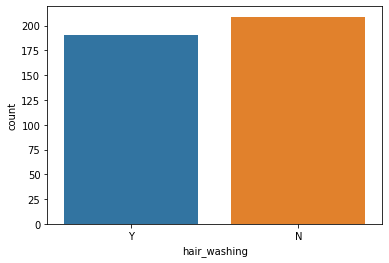

In [ ]:
sns.countplot(x='hair_washing', data = Data)

In [ ]:
hair_washing = ['N', 'Y']

ord_enc_inc = OrdinalEncoder(categories=[hair_washing])
cat_ord_inc = pd.DataFrame(ord_enc_inc.fit_transform(Data[['hair_washing']]))
cat_ord_inc.columns = ['hair_washing']

In [ ]:
Data = Data.drop('hair_washing', axis=1)
Data=pd.concat([Data.reset_index(drop=True), cat_ord_inc], axis=1)
Data.head()

,stay_up_late,coffee_consumed,brain_working_duration,hair_grease,dandruff,libido,hair_loss,pressure_level,school_assesssment,stress_level,shampoo_brand_Hair & Shoulder,shampoo_brand_Pantene,swimming,hair_washing
0,2,0,1,3.0,None,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0,0,3,1.0,None,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,0,2.0,None,2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,2,0,1,3.0,None,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,0,1,1.0,None,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Dandruff

In [ ]:
Data['dandruff'].value_counts()

None    289
Few      76
Many     35
Name: dandruff, dtype: int64

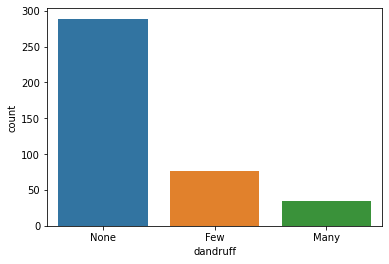

In [ ]:
sns.countplot(x='dandruff', data = Data)

In [ ]:
dandruff = ['None', 'Few', 'Many']

ord_enc_inc = OrdinalEncoder(categories=[dandruff])
cat_ord_inc = pd.DataFrame(ord_enc_inc.fit_transform(Data[['dandruff']]))
cat_ord_inc.columns = ['dandruff']

In [ ]:
Data = Data.drop('dandruff', axis=1)
Data=pd.concat([Data.reset_index(drop=True), cat_ord_inc], axis=1)
Data.head()

,stay_up_late,coffee_consumed,brain_working_duration,hair_grease,libido,hair_loss,pressure_level,school_assesssment,stress_level,shampoo_brand_Hair & Shoulder,shampoo_brand_Pantene,swimming,hair_washing,dandruff
0,2,0,1,3.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0,3,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1,0,2.0,2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,2,0,1,3.0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,0,1,1.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Categorical Feature Selection

In the categorical feature selection i will use selectKbest with chi2, because its suitable for the categorical data and categorical target.

In [ ]:
categorical = Data[['hair_loss', 'pressure_level',
       'school_assesssment', 'stress_level', 'shampoo_brand_Hair & Shoulder',
       'shampoo_brand_Pantene', 'swimming', 'hair_washing', 'dandruff']]

In [ ]:
X = categorical.drop('hair_loss',axis=1)
y = categorical['hair_loss']

In [ ]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_

array([380.47269809, 190.5246996 , 406.84629489,  11.54982875,
        24.82758464,  17.74518266,   0.97798716, 301.72468771])

In [ ]:
np.round_(fit.scores_)

array([380., 191., 407.,  12.,  25.,  18.,   1., 302.])

In [ ]:
chi = pd.Series(fit.scores_)
chi.index = X.columns
chi.sort_values(ascending=False)

stress_level                     406.846295
pressure_level                   380.472698
dandruff                         301.724688
school_assesssment               190.524700
shampoo_brand_Pantene             24.827585
swimming                          17.745183
shampoo_brand_Hair & Shoulder     11.549829
hair_washing                       0.977987
dtype: float64

Thus i will use all the triple digit for my feature on the model

In [ ]:
cat = Data[['stress_level', 'pressure_level', 'dandruff', 'school_assesssment', 'hair_loss' ]]
cat.head()

,stress_level,pressure_level,dandruff,school_assesssment,hair_loss
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


## Numerical Data

### Data Distribution

In here i wanna check the data distribution for numerical data

In [ ]:
numeric = Data[['stay_up_late', 'coffee_consumed', 'brain_working_duration',
       'hair_grease']]

In [ ]:
def plot_dist(numeric, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(numeric[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(numeric[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(numeric[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=numeric[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(numeric[col].name + ' Skewness: ' + str(numeric[col].skew()))
    if -0.5 <= numeric[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif numeric[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif numeric[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

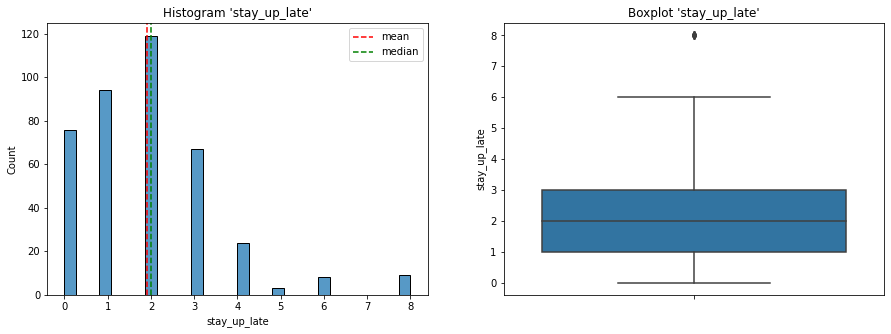

stay_up_late Skewness: 1.4277967573757753
Columns 'stay_up_late' right skewed


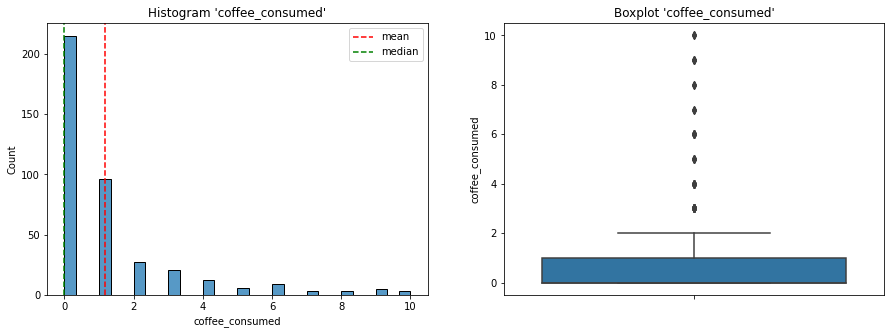

coffee_consumed Skewness: 2.4293437073449087
Columns 'coffee_consumed' right skewed


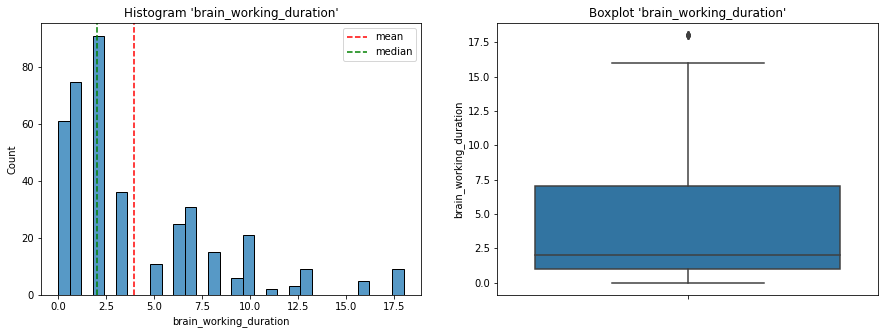

brain_working_duration Skewness: 1.4581329329774533
Columns 'brain_working_duration' right skewed


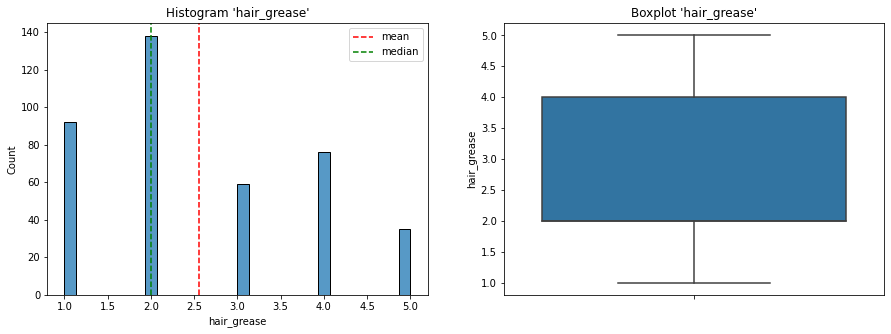

hair_grease Skewness: 0.4500984633798053
Columns 'hair_grease' normal distribution


In [ ]:
for col in numeric.columns:
    plot_dist(numeric,col)

In [ ]:
for k in numeric:
  Q3 = numeric[k].quantile(.75)
  Q1 = numeric[k].quantile(.15)

  IQR = Q3 - Q1

  upper = Q3 + (3 * IQR)
  lower = Q1 - (3 * IQR)

  outlier = numeric[(numeric[k] > upper) | (numeric[k] < lower)]
  print(k)
  print('count of outlier: ', outlier.shape[0])
  print('percent k of outlier: ', outlier.shape[0]/numeric.shape[0] * 100, '%')
  print('='*70)

stay_up_late
count of outlier:  0
percent k of outlier:  0.0 %
coffee_consumed
count of outlier:  29
percent k of outlier:  7.249999999999999 %
brain_working_duration
count of outlier:  0
percent k of outlier:  0.0 %
hair_grease
count of outlier:  0
percent k of outlier:  0.0 %


In this dataset case i dont want to cap or drop any outlier because of i think that i need the real data of each value because each and every data counts because of the lack amount of data that i've got

### Numerical Feature Selection

In the numerical feature selection i will use mutual info classif, because its suitable for the numerical data and categorical target.

In [ ]:
X2 = numeric

In [ ]:
mutual_info = mutual_info_classif(X2, y)
mutual_info

array([0.19462254, 0.56036138, 0.18139045, 0.34901463])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X2.columns
mutual_info.sort_values(ascending=False)

coffee_consumed           0.560361
hair_grease               0.349015
stay_up_late              0.194623
brain_working_duration    0.181390
dtype: float64

Thus i will use the top 2 for my numerical data 

In [ ]:
num = Data[['coffee_consumed', 'hair_grease']]

## New Data

In [ ]:
NewData = Dataset[['coffee_consumed', 'hair_grease', 'stress_level', 'pressure_level', 'dandruff', 'school_assesssment', 'hair_loss' ]]

In [ ]:
NewData.head()

,coffee_consumed,hair_grease,stress_level,pressure_level,dandruff,school_assesssment,hair_loss
0,0,3.0,Low,Low,None,None,Few
1,0,1.0,Low,Low,None,None,Few
2,1,2.0,Low,Low,None,None,Medium
3,0,3.0,Low,Low,None,None,Few
4,0,1.0,Low,Low,None,None,Few


### Hair Loss (Target)

I want to look at my target which is the 'hair_loss' columns since in my personal opinion when you want to make a classification machine learning the balanced of your target is really important to the accuracy of the model.

Thus here is the target

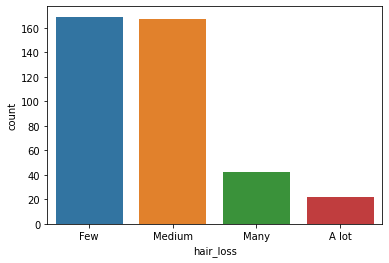

In [ ]:
sns.countplot(x='hair_loss', data = NewData)

Above we can see that Luke's hair loss class shows an imbalanced data, especially on the 'many' and 'A lot' class. Thus, i will combine both class since they are the worst class for the hair loss and make it the same value.

In [ ]:
NewData.loc[NewData["hair_loss"] == "A lot", "hair_loss"] = "Many"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


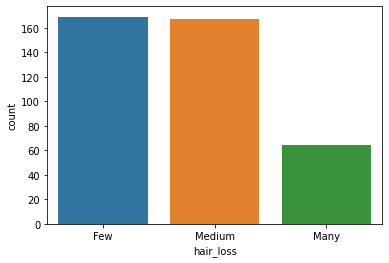

In [ ]:
sns.countplot(x='hair_loss', data = NewData)

But since the 'Many' data still have a really small amount of data, hence i will do oversampling for 'Many' with SMOTE and focusing on the minority one after all the data preprocessing step. 

Here i also want to encode the target with ordinal encoder

In [ ]:
hair_loss = ['Few', 'Medium', 'Many']

ord_enc_inc = OrdinalEncoder(categories=[hair_loss])
cat_ord_inc = pd.DataFrame(ord_enc_inc.fit_transform(NewData[['hair_loss']]))
cat_ord_inc.columns = ['hair_loss']

In [ ]:
NewData = NewData.drop('hair_loss', axis=1)
NewData=pd.concat([NewData.reset_index(drop=True), cat_ord_inc], axis=1)
NewData

,coffee_consumed,hair_grease,stress_level,pressure_level,dandruff,school_assesssment,hair_loss
0,0,3.0,Low,Low,None,None,0.0
1,0,1.0,Low,Low,None,None,0.0
2,1,2.0,Low,Low,None,None,1.0
3,0,3.0,Low,Low,None,None,0.0
4,0,1.0,Low,Low,None,None,0.0
...,...,...,...,...,...,...,...
395,1,1.0,Low,Low,None,None,1.0
396,0,2.0,Low,Low,None,None,0.0
397,1,2.0,Low,Low,None,None,1.0
398,1,2.0,Low,Low,None,None,1.0


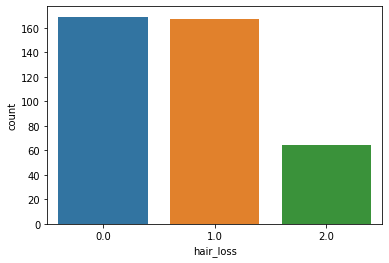

In [ ]:
sns.countplot(x='hair_loss', data = Data)

Thus here are the new target

In [ ]:
NewData.head()

,coffee_consumed,hair_grease,stress_level,pressure_level,dandruff,school_assesssment,hair_loss
0,0,3.0,Low,Low,None,None,0.0
1,0,1.0,Low,Low,None,None,0.0
2,1,2.0,Low,Low,None,None,1.0
3,0,3.0,Low,Low,None,None,0.0
4,0,1.0,Low,Low,None,None,0.0


# Split Dataset

Now in here we want to split the dataset

In [ ]:
train, test = train_test_split(NewData, stratify=y, train_size=0.8)

In [ ]:
X_train = train.drop('hair_loss', axis=1)
X_test = test.drop('hair_loss', axis=1)

y_train = train['hair_loss']
y_test = test['hair_loss']

# Pipeline Preprocess

In this section i want to make a pipeline for data preprocessing on the numerical and categorical data.

## Numerical

In [ ]:
num_pipeline = Pipeline([
        ('scaler', MinMaxScaler())
    ])

num_tr = num_pipeline.fit_transform(X_train[['coffee_consumed', 'hair_grease']])
num_tr

array([[0.  , 0.  ],
       [0.  , 0.5 ],
       [0.1 , 0.75],
       [0.  , 0.25],
       [0.2 , 0.75],
       [0.4 , 0.75],
       [0.2 , 0.75],
       [0.  , 0.5 ],
       [0.2 , 0.75],
       [0.  , 0.  ],
       [0.1 , 0.25],
       [0.4 , 0.75],
       [0.2 , 0.75],
       [0.1 , 0.5 ],
       [0.7 , 1.  ],
       [0.1 , 0.25],
       [0.1 , 0.25],
       [0.2 , 0.75],
       [0.  , 0.  ],
       [0.  , 0.75],
       [0.1 , 0.25],
       [0.  , 0.25],
       [0.1 , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.1 , 0.  ],
       [0.2 , 0.75],
       [0.4 , 0.75],
       [0.  , 0.  ],
       [0.1 , 0.  ],
       [0.  , 0.25],
       [0.  , 0.25],
       [0.  , 0.25],
       [0.  , 0.25],
       [0.  , 0.25],
       [0.1 , 0.5 ],
       [0.1 , 0.5 ],
       [0.2 , 0.75],
       [0.  , 0.5 ],
       [0.2 , 0.75],
       [0.1 , 0.25],
       [0.  , 0.25],
       [0.  , 0.25],
       [0.3 , 0.75],
       [0.  , 0.  ],
       [1.  , 1.  ],
       [0.  , 0.25],
       [0.1 ,

## Categorical

In [ ]:
cat_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=[['Low', 'Medium', 'High', 'Very High'], ['Low', 'Medium', 'High', 'Very High'], ['None', 'Few', 'Many'], 
                                                   ['None', 'Team ass', 'Individual ass', 'Final exam revision', 'Final exam'],])) #odor & fat
    ])

cat_tr = cat_pipeline.fit_transform(X_train[['stress_level', 'pressure_level', 'dandruff', 'school_assesssment']])
cat_tr

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 1., 1., 2.],
       ...,
       [0., 0., 0., 0.],
       [1., 1., 0., 0.],
       [3., 3., 2., 4.]])

and then i want to set a full pipeline, combining the numerical and the categorical

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['coffee_consumed', 'hair_grease']),
        ("cat_ord", cat_pipeline, ['stress_level', 'pressure_level', 'dandruff', 'school_assesssment'])
    ])

train_tr = full_pipeline.fit_transform(X_train)
train_tr

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.5 , 0.  , 1.  , 0.  , 0.  ],
       [0.1 , 0.75, 1.  , 1.  , 1.  , 2.  ],
       ...,
       [0.  , 0.25, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.5 , 1.  , 1.  , 0.  , 0.  ],
       [0.9 , 1.  , 3.  , 3.  , 2.  , 4.  ]])

# Pipeline Oversampling

Now in here i will make a pipeline to do both data preprocessing and oversampling with SMOTENC, because of the imbalanced data that i mention before on the target analysis.

In [ ]:
# imbalance pipeline
final = imbpipe([
            ('preprocess', full_pipeline),
            ('over_sampl', SMOTENC([3, 4, 5], sampling_strategy='minority', random_state=0))
])

final

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['coffee_consumed',
                                                   'hair_grease']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Very '
                                                       

In [ ]:
X_resampled, y_resampled = final.fit_resample(X_train, y_train)
resampled = pd.concat([pd.DataFrame(X_resampled, columns=X_train.columns.tolist()), pd.DataFrame(y_resampled)], axis=1)
resampled

,coffee_consumed,hair_grease,stress_level,pressure_level,dandruff,school_assesssment,hair_loss
0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.50,0.0,1.0,0.0,0.0,0.0
2,0.100000,0.75,1.0,1.0,1.0,2.0,1.0
3,0.000000,0.25,0.0,0.0,0.0,0.0,0.0
4,0.200000,0.75,2.0,2.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...
399,0.949868,1.00,3.0,3.0,2.0,4.0,2.0
400,0.700000,1.00,3.0,3.0,2.0,1.0,2.0
401,0.200000,0.75,3.0,2.0,1.0,3.0,2.0
402,0.900000,1.00,3.0,3.0,2.0,4.0,2.0


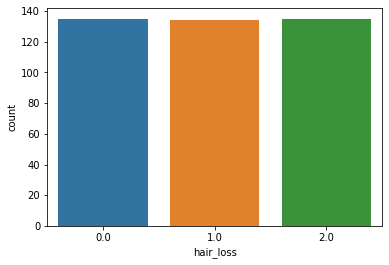

In [ ]:
sns.countplot(x='hair_loss', data = resampled)

and the pipeline works.

# Model Definition

On here i want to set 4 model and after it we will evaluate all the model with cross validation then i will use the best one.

In [ ]:
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()

# Model Training

Train all the data

In [ ]:
for model in [tree, rf, knn, ada]:
    model.fit(X_resampled, y_resampled)

# Model Evaluation

In [ ]:
cv_dt_model = cross_val_score(tree,X_resampled, y_resampled, cv=3, scoring="accuracy")
cv_rf_model = cross_val_score(rf,X_resampled, y_resampled, cv=3, scoring="accuracy")
cv_knn_model = cross_val_score(knn,X_resampled, y_resampled, cv=3, scoring="accuracy")
cv_adaboost_model = cross_val_score(ada,X_resampled, y_resampled, cv=3, scoring="accuracy")

In [ ]:
cvh=0 # cross validation highest. At this point it's not determined and thus I use 0.

for cv,name in zip([cv_dt_model,cv_rf_model,cv_knn_model,cv_adaboost_model],
['Decision Tree','Random Forest','KNN','Adaboost']):
    print(name)
    print('Accuracy - All - Cross Validation  : ', cv)
    print('Accuracy - Mean - Cross Validation : ', cv.mean())
    print('Accuracy - Std - Cross Validation  : ', cv.std())
    print('Accuracy - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cvh:
        cvh= cv.mean()
        nameh=name # nameh is the name of the model that has the highest cross validation score
    else:
        continue
        
print ('best model:', nameh)
print('cross-val mean:', cvh)

Decision Tree
Accuracy - All - Cross Validation  :  [0.88888889 0.8962963  0.92537313]
Accuracy - Mean - Cross Validation :  0.9035194398378478
Accuracy - Std - Cross Validation  :  0.015746013109953758
Accuracy - Range of Test-Set       :  0.887773426727894 - 0.9192654529478015
--------------------------------------------------
Random Forest
Accuracy - All - Cross Validation  :  [0.88888889 0.92592593 0.92537313]
Accuracy - Mean - Cross Validation :  0.9133959830477244
Accuracy - Std - Cross Validation  :  0.017330601888376655
Accuracy - Range of Test-Set       :  0.8960653811593478 - 0.930726584936101
--------------------------------------------------
KNN
Accuracy - All - Cross Validation  :  [0.88148148 0.88148148 0.91044776]
Accuracy - Mean - Cross Validation :  0.8911369080523309
Accuracy - Std - Cross Validation  :  0.013654835206992805
Accuracy - Range of Test-Set       :  0.8774820728453381 - 0.9047917432593238
--------------------------------------------------
Adaboost
Accurac

Since the best model is Random Forest, thus we will use it for the pipeline combining it with oversampling and preprocess

# Pipeline Preprocess + Oversampling + Model

In [ ]:
num_pipeline = Pipeline([
        ('scaler', MinMaxScaler())
    ])

cat_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=[['Low', 'Medium', 'High', 'Very High'], ['Low', 'Medium', 'High', 'Very High'], ['None', 'Few', 'Many'], 
                                                   ['None', 'Team ass', 'Individual ass', 'Final exam revision', 'Final exam'],])) #odor & fat
    ])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['coffee_consumed', 'hair_grease']),
        ("cat_ord", cat_pipeline, ['stress_level', 'pressure_level', 'dandruff', 'school_assesssment'])
    ])


# preprocess + model
full_imbhandling = imbpipe([
            ('preprocess', full_pipeline),
            ('over_sampl', SMOTENC([3, 4, 5], sampling_strategy='minority', random_state=0)),
            ('random_forest', RandomForestClassifier(random_state=0))
])


full_imbhandling

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['coffee_consumed',
                                                   'hair_grease']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Very '
                                                       

In [ ]:
full_imbhandling.fit(X_train, y_train)

# evaluate on test
handled_pred = full_imbhandling.predict(X_test)

print(classification_report(y_test, handled_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        34
         1.0       0.81      0.64      0.71        33
         2.0       0.79      0.85      0.81        13

    accuracy                           0.79        80
   macro avg       0.79      0.80      0.79        80
weighted avg       0.79      0.79      0.78        80



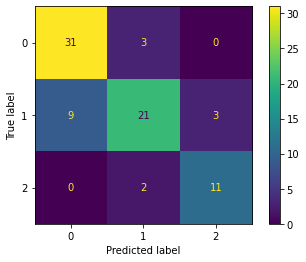

In [ ]:
cm = confusion_matrix(y_test, handled_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

The next step after this i want to improve my model with randomsearch cv for finding the best parameter in my model

# Model Improvement

In [ ]:
# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'criterion': ['entropy', 'gini']}

In [ ]:
# Train with Random Search

rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                                 param_distributions=random_grid,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='accuracy')
rf_randomcv.fit(X_resampled, y_resampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=46, scoring='accuracy')

Here are my best parameter

In [ ]:
rf_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 340,
 'criterion': 'gini'}

In [ ]:
# Get Best Estimator

rf_randomcv_best = rf_randomcv.best_estimator_

# Pipeline after Model Improvement

In [ ]:
full_imbhandling_improve = imbpipe([
            ('preprocess', full_pipeline),
            ('over_sampl', SMOTENC([3, 4, 5], sampling_strategy='minority', random_state=0)),
            ('random_forest', rf_randomcv_best)
])


full_imbhandling_improve

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['coffee_consumed',
                                                   'hair_grease']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Very '
                                                       

## Before

Accuracy Score - Test Set   :  0.7875 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        34
         1.0       0.81      0.64      0.71        33
         2.0       0.79      0.85      0.81        13

    accuracy                           0.79        80
   macro avg       0.79      0.80      0.79        80
weighted avg       0.79      0.79      0.78        80
 

Confusion Matrix      : 


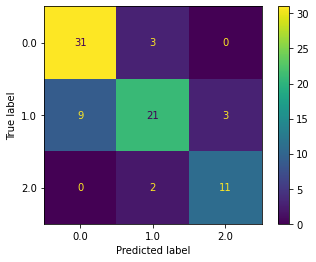

In [ ]:
y_pred_test = full_imbhandling.predict(X_test)

print('Accuracy Score - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(full_imbhandling, X_test, y_test))

## After

Accuracy Score - Test Set   :  0.7875 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        34
         1.0       0.81      0.64      0.71        33
         2.0       0.79      0.85      0.81        13

    accuracy                           0.79        80
   macro avg       0.79      0.80      0.79        80
weighted avg       0.79      0.79      0.78        80
 

Confusion Matrix      : 


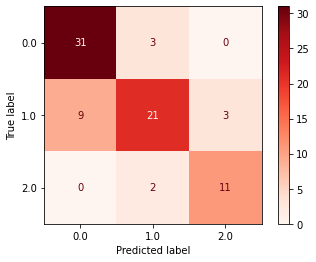

In [ ]:
y_pred_test = full_imbhandling_improve.predict(X_test)

print('Accuracy Score - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(full_imbhandling_improve, X_test, y_test, cmap='Reds'))

Strangely, i dont understand after the model improvement there are no changes on the accuracy nor the recall or precision. so it dont really matter which model that i used since both have the same accuracy

# Model Inference

In [ ]:
inf = NewData.sample(20, random_state=10)
inf.reset_index(drop=True, inplace=True)
inf

,coffee_consumed,hair_grease,stress_level,pressure_level,dandruff,school_assesssment,hair_loss
0,2,4.0,Very High,High,Few,Final exam revision,2.0
1,0,4.0,High,Medium,Few,None,2.0
2,0,2.0,Low,Low,None,None,0.0
3,3,4.0,High,High,Few,Team ass,1.0
4,1,3.0,Low,Low,None,None,1.0


In [ ]:
inf_final = inf.drop('hair_loss', axis=1)
inf_final.head()

,coffee_consumed,hair_grease,stress_level,pressure_level,dandruff,school_assesssment
0,2,4.0,Very High,High,Few,Final exam revision
1,0,4.0,High,Medium,Few,None
2,0,2.0,Low,Low,None,None
3,3,4.0,High,High,Few,Team ass
4,1,3.0,Low,Low,None,None


Apply Pipeline

In [ ]:
y_pred_inf = full_imbhandling_improve.predict(inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Predicted Class'])
y_pred_inf_df.head()

,Predicted Class
0,2.0
1,2.0
2,0.0
3,2.0
4,1.0


In [ ]:
y_pred_inf_df['Real Data'] = inf['hair_loss']
y_pred_inf_df

,Predicted Class,Real Data
0,2.0,2.0
1,2.0,2.0
2,0.0,0.0
3,2.0,1.0
4,1.0,1.0
5,1.0,1.0
6,1.0,1.0
7,2.0,2.0
8,1.0,0.0
9,2.0,2.0


# Conclusion

Based on this luke's hair lost dataset, i can conclude that what really effected somebody hair loss is how many coffee you consume a day, your hair dandruff and stress level, in luke's case school assessment.

because on the modelling we got an accuracy of 0.78 

Accuracy Score - Test Set   :  0.7875 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        34
         1.0       0.81      0.64      0.71        33
         2.0       0.79      0.85      0.81        13

    accuracy                           0.79        80
   macro avg       0.79      0.80      0.79        80
weighted avg       0.79      0.79      0.78        80
 

Confusion Matrix      : 


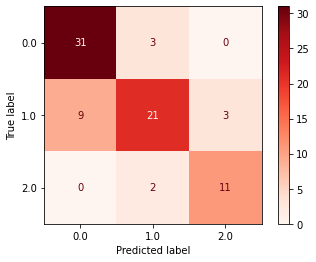

In [ ]:
y_pred_test = full_imbhandling_improve.predict(X_test)

print('Accuracy Score - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(full_imbhandling_improve, X_test, y_test, cmap='Reds'))

As we can see above is our model did not predict number 2 false, since number 2 is the 'Many' hair loss level. It means that i want to focus on the recall 2 because its the false negative one, and on this case we it have an 0.85 score that mean i can conclude my model works well.

For further usage we can use my model for predicting somebody hair loss by theyre habit as above (How many coffee you consume a day, your hair dandruff and stress level) 

# Model Deploy

In [553]:
import pickle

In [554]:
# save model
pickle.dump(full_imbhandling_improve, open("hair_loss.pkl", "wb"))

In [555]:
model = pickle.load(open("hair_loss.pkl", "rb"))

In [556]:
clas = model.predict(inf_final).tolist()[0]
clas

2.0